In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import plotly.express as px
%matplotlib inline

/tmp/ipykernel_248249/1991343199.py:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


# Overview

In [2]:
df = pd.read_excel('.././materials/baza zanonimizowana.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   NEW IDENTIFIER                 416 non-null    object 
 1   wiek                           405 non-null    float64
 2   PSA                            401 non-null    float64
 3   data operacji                  404 non-null    object 
 4   PSAdensity                     402 non-null    float64
 5   Prostate vol                   0 non-null      float64
 6   DRE                            0 non-null      float64
 7   MRI vol                        402 non-null    float64
 8   MRI Pirads                     402 non-null    float64
 9   lokalizacja                    37 non-null     object 
 10  MRI EPE (naciek poza torebke)  403 non-null    float64
 11  MRI EPE L                      404 non-null    float64
 12  MRI EPE P                      404 non-null    flo

In [3]:
df.shape

(416, 37)

In [4]:
df[['% P', 'ilość\xa0+ wycinków P', '% L', 'Ilość + wycinków L']]

% P        ilość + wycinków P   % L Ilość + wycinków L
0     40.0                      2na4  20.0               1na5
1     20.0  1na5 20% fuzja 2na3 10%   80.0       0na4, 3 na 3
2      0.0                      0na7  45.0               6na7
3     80.0                       NaN  75.0                NaN
4    100.0                       NaN   0.0                NaN
..     ...                       ...   ...                ...
411    NaN                       NaN   NaN                NaN
412    NaN                       NaN   NaN                NaN
413    NaN                       NaN   NaN                NaN
414    NaN                       NaN   NaN                NaN
415    NaN                       NaN   NaN                NaN

[416 rows x 4 columns]

In [5]:
df.rename(columns={'NEW IDENTIFIER': 'ID'}, inplace=True)

In [6]:
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_columns = None
df.describe(include='all')

ID   wiek    PSA        data operacji  PSAdensity  Prostate vol   \
count       416 405.00 401.00                  404      402.00           0.00   
unique      413    NaN    NaN                  328         NaN            NaN   
top     ID00049    NaN    NaN  2018-03-01 00:00:00         NaN            NaN   
freq          2    NaN    NaN                    6         NaN            NaN   
mean        NaN  64.22  13.83                  NaN        0.36            NaN   
std         NaN   6.20  24.64                  NaN        0.63            NaN   
min         NaN  43.00   1.30                  NaN        0.00            NaN   
25%         NaN  60.00   5.90                  NaN        0.14            NaN   
50%         NaN  64.00   8.10                  NaN        0.22            NaN   
75%         NaN  68.00  12.70                  NaN        0.35            NaN   
max         NaN  83.00 290.00                  NaN        9.18            NaN   

        DRE  MRI vol  MRI Pirads lokalizacja  MRI EPE (naciek poza torebke)  \
count  0.00   402.00      402.00          37                         403.00   
unique  NaN      NaN         NaN          27                            NaN   
top     NaN      NaN         NaN          PP                            NaN   
freq    NaN      NaN         NaN           6                            NaN   
mean    NaN    42.89        4.19         NaN                           0.15   
std     NaN    22.19        0.82         NaN                           0.35   
min     NaN    12.00        1.00         NaN                           0.00   
25%     NaN    30.00        4.00         NaN                           0.00   
50%     NaN    37.00        4.00         NaN                           0.00   
75%     NaN    50.75        5.00         NaN                           0.00   
max     NaN   214.00        5.00         NaN                           1.00   

        MRI EPE L  MRI EPE P  MRI SVI (pecherzyki)  MRI SVI L  MRI SVI P  \
count      404.00     404.00                404.00     403.00     404.00   
unique        NaN        NaN                   NaN        NaN        NaN   
top           NaN        NaN                   NaN        NaN        NaN   
freq          NaN        NaN                   NaN        NaN        NaN   
mean         0.07       0.12                  0.08       0.05       0.06   
std          0.26       0.32                  0.27       0.21       0.24   
min          0.00       0.00                  0.00       0.00       0.00   
25%          0.00       0.00                  0.00       0.00       0.00   
50%          0.00       0.00                  0.00       0.00       0.00   
75%          0.00       0.00                  0.00       0.00       0.00   
max          1.00       1.00                  1.00       1.00       1.00   

        MRI SIZE  Bx ISUP Grade P    % P ilość + wycinków P  Bx ISUP Grade L  \
count     374.00           392.00  27.00                 18           393.00   
unique       NaN             7.00    NaN                 13              NaN   
top          NaN             1.00    NaN               2na6              NaN   
freq         NaN           145.00    NaN                  4              NaN   
mean       15.59              NaN  46.04                NaN             1.38   
std         8.80              NaN  36.02                NaN             1.33   
min         0.00              NaN   0.00                NaN             0.00   
25%        10.00              NaN  12.50                NaN             0.00   
50%        13.00              NaN  45.00                NaN             1.00   
75%        19.00              NaN  80.00                NaN             2.00   
max        63.00              NaN 100.00                NaN             5.00   

          % L Ilość + wycinków L  ISUP RP  ISUP RP P  ISUP RP L   SM +    N +  \
count   27.00                 17   401.00     401.00     401.00 403.00 404.00   
unique    NaN                 12      NaN        NaN   

In [7]:
print(df['Bx ISUP Grade P'].dtype)
df['Bx ISUP Grade P'].unique()

object


array([1, 0, 4, 2, 3, nan, '??????????', 5], dtype=object)

In [8]:
df['Bx ISUP Grade P'].replace({'??????????': np.nan}, inplace=True)

/tmp/ipykernel_248249/1019528388.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Bx ISUP Grade P'].replace({'??????????': np.nan}, inplace=True)
/tmp/ipykernel_248249/1019528388.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Bx ISUP Grade P'].replace({'??????????': np.nan}, inplace=

# Missing values

In [9]:
non_missing_count_df = pd.DataFrame(len(df) - df.isna().sum()).reset_index().rename(columns={'index': 'column', 0: 'non_missing_count'})
low_values_cols = non_missing_count_df[non_missing_count_df['non_missing_count'] < len(df)* 0.15]['column'].tolist()
low_values_cols

['Prostate vol ',
 'DRE',
 'lokalizacja',
 '% P',
 'ilość\xa0+ wycinków P',
 '% L',
 'Ilość + wycinków L',
 'Kolumna2',
 'Kolumna3']

In [10]:
cols_to_drop = [
    # totally empty cols
    'Prostate vol ',
    'DRE',
    # mostly empty cols / unusable data
    'lokalizacja',
    '% P',
    'ilość\xa0+ wycinków P',
    '% L',
    'Ilość + wycinków L',
    'Kolumna2',
    'Kolumna3',
    # unnecessary cols
    'data operacji'
]

In [11]:
reduced_df = df.drop(columns=cols_to_drop)
reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             416 non-null    object 
 1   wiek                           405 non-null    float64
 2   PSA                            401 non-null    float64
 3   PSAdensity                     402 non-null    float64
 4   MRI vol                        402 non-null    float64
 5   MRI Pirads                     402 non-null    float64
 6   MRI EPE (naciek poza torebke)  403 non-null    float64
 7   MRI EPE L                      404 non-null    float64
 8   MRI EPE P                      404 non-null    float64
 9   MRI SVI (pecherzyki)           404 non-null    float64
 10  MRI SVI L                      403 non-null    float64
 11  MRI SVI P                      404 non-null    float64
 12  MRI SIZE                       374 non-null    flo

There are patients with no data, we delete them

In [12]:
reduced_df[reduced_df['wiek'].isnull()]['ID']

41     ID00041
404    ID00412
405    ID00404
406    ID00401
407    ID00389
408    ID00380
409    ID00307
410    ID00280
411    ID00262
413    ID00173
415    ID00009
Name: ID, dtype: object

In [13]:
reduced_df.drop(reduced_df[reduced_df['wiek'].isnull()]['ID'].index, inplace=True)

In [14]:
reduced_df[reduced_df['MRI vol'].isnull()]['ID']


20     ID00019
150    ID00151
193    ID00195
Name: ID, dtype: object

In [15]:
reduced_df[reduced_df['ID'].isin(['ID00019', 'ID00151', 'ID00195'])]

ID  wiek   PSA  PSAdensity  MRI vol  MRI Pirads  \
20   ID00019 53.00 30.00         NaN      NaN         NaN   
150  ID00151 67.00 12.40         NaN      NaN        3.00   
193  ID00195 68.00  9.10         NaN      NaN        4.00   

     MRI EPE (naciek poza torebke)  MRI EPE L  MRI EPE P  \
20                             NaN        NaN        NaN   
150                           0.00       0.00       0.00   
193                           0.00       0.00       0.00   

     MRI SVI (pecherzyki)  MRI SVI L  MRI SVI P  MRI SIZE  Bx ISUP Grade P  \
20                    NaN        NaN        NaN       NaN             4.00   
150                  0.00       0.00       0.00     14.00             1.00   
193                  0.00       0.00       0.00     11.00             1.00   

     Bx ISUP Grade L  ISUP RP  ISUP RP P  ISUP RP L  SM +  N +  EPE RP  \
20              4.00     5.00       5.00       5.00  0.00 1.00    1.00   
150             0.00     1.00       1.00       1.00  0.00 0.00    0.00   
193             1.00     2.00       2.00       1.00  0.00 0.00    0.00   

     EPE L RP  EPE P RP  SVI RP  SVI RP L  SVI RP P  TNM  
20       1.00      1.00    1.00      1.00      1.00  t3b  
150      0.00      0.00    0.00      0.00      0.00  t2c  
193      0.00      0.00    0.00      0.00      0.00  t2c

Patient 19 is missing MRI data.

Patients 151 and 195 are missing prostate volume from MRI scan, thus they also miss PSAdensity.

We delete patient 19 because prediction is based on MRI data. \
For patients 151 and 195 MRI vol is filled in based on median value of the column for all patients with same TNM, then PSAdensity is calculated.

In [16]:
reduced_df.drop(20, inplace=True)

In [17]:
t2c_median_vol = reduced_df[reduced_df['TNM'] == 't2c']['MRI vol'].median()
print(t2c_median_vol)

36.0


In [18]:
reduced_df.at[150, 'MRI vol'] = t2c_median_vol
reduced_df.at[193, 'MRI vol'] = t2c_median_vol
reduced_df.at[150, 'PSAdensity'] = (reduced_df.loc[150, 'PSA'] / reduced_df.loc[150, 'MRI vol']).round(2)
reduced_df.at[193, 'PSAdensity'] = (reduced_df.loc[193, 'PSA'] / reduced_df.loc[193, 'MRI vol']).round(2)

In [19]:
reduced_df[reduced_df['ID'].isin(['ID00151', 'ID00195'])]

ID  wiek   PSA  PSAdensity  MRI vol  MRI Pirads  \
150  ID00151 67.00 12.40        0.34    36.00        3.00   
193  ID00195 68.00  9.10        0.25    36.00        4.00   

     MRI EPE (naciek poza torebke)  MRI EPE L  MRI EPE P  \
150                           0.00       0.00       0.00   
193                           0.00       0.00       0.00   

     MRI SVI (pecherzyki)  MRI SVI L  MRI SVI P  MRI SIZE  Bx ISUP Grade P  \
150                  0.00       0.00       0.00     14.00             1.00   
193                  0.00       0.00       0.00     11.00             1.00   

     Bx ISUP Grade L  ISUP RP  ISUP RP P  ISUP RP L  SM +  N +  EPE RP  \
150             0.00     1.00       1.00       1.00  0.00 0.00    0.00   
193             1.00     2.00       2.00       1.00  0.00 0.00    0.00   

     EPE L RP  EPE P RP  SVI RP  SVI RP L  SVI RP P  TNM  
150      0.00      0.00    0.00      0.00      0.00  t2c  
193      0.00      0.00    0.00      0.00      0.00  t2c

Other missing values

In [20]:
reduced_df.isnull().sum()

ID                                0
wiek                              0
PSA                               4
PSAdensity                        0
MRI vol                           0
MRI Pirads                        2
MRI EPE (naciek poza torebke)     1
MRI EPE L                         0
MRI EPE P                         0
MRI SVI (pecherzyki)              0
MRI SVI L                         1
MRI SVI P                         0
MRI SIZE                         30
Bx ISUP Grade P                  14
Bx ISUP Grade L                  12
ISUP RP                           4
ISUP RP P                         4
ISUP RP L                         4
SM +                              2
N +                               1
EPE RP                            4
EPE L RP                          4
EPE P RP                          4
SVI RP                            3
SVI RP L                          3
SVI RP P                          3
TNM                               2
dtype: int64

Decide later on handling

# Report

In [21]:
ProfileReport(reduced_df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 27/27 [00:00<00:00, 63.68it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [22]:
duplicated_ids = reduced_df[reduced_df['ID'].duplicated()]
duplicated_ids

ID  wiek   PSA  PSAdensity  MRI vol  MRI Pirads  \
49   ID00049 68.00 16.90        0.14   122.00        5.00   
237  ID00239 62.00  4.30        0.16    27.00        5.00   
280  ID00285 70.00  4.40        0.07    59.00        5.00   

     MRI EPE (naciek poza torebke)  MRI EPE L  MRI EPE P  \
49                            0.00       0.00       0.00   
237                           0.00       0.00       0.00   
280                           1.00       1.00       1.00   

     MRI SVI (pecherzyki)  MRI SVI L  MRI SVI P  MRI SIZE  Bx ISUP Grade P  \
49                   0.00       0.00       0.00     60.00             1.00   
237                  0.00       0.00       0.00     16.00             2.00   
280                  1.00       1.00       1.00     31.00             4.00   

     Bx ISUP Grade L  ISUP RP  ISUP RP P  ISUP RP L  SM +  N +  EPE RP  \
49              1.00     1.00       1.00       1.00  1.00 0.00    0.00   
237             0.00     3.00       3.00       3.00  0.00 0.00    0.00   
280             3.00     4.00       4.00       4.00  0.00 1.00    1.00   

     EPE L RP  EPE P RP  SVI RP  SVI RP L  SVI RP P  TNM  
49       0.00      0.00    1.00      0.00      1.00  t3b  
237      0.00      0.00    0.00      0.00      0.00  t2c  
280      1.00      1.00    0.00      0.00      0.00    ?

In [23]:
reduced_df[reduced_df['ID'] == 'ID00049']

ID  wiek   PSA  PSAdensity  MRI vol  MRI Pirads  \
2   ID00049 64.00  8.30        0.21    40.00        4.00   
49  ID00049 68.00 16.90        0.14   122.00        5.00   

    MRI EPE (naciek poza torebke)  MRI EPE L  MRI EPE P  MRI SVI (pecherzyki)  \
2                            0.00       0.00       0.00                  0.00   
49                           0.00       0.00       0.00                  0.00   

    MRI SVI L  MRI SVI P  MRI SIZE  Bx ISUP Grade P  Bx ISUP Grade L  ISUP RP  \
2        0.00       0.00     12.00             0.00             1.00     2.00   
49       0.00       0.00     60.00             1.00             1.00     1.00   

    ISUP RP P  ISUP RP L  SM +  N +  EPE RP  EPE L RP  EPE P RP  SVI RP  \
2        2.00       2.00  0.00 0.00    0.00      0.00      0.00    0.00   
49       1.00       1.00  1.00 0.00    0.00      0.00      0.00    1.00   

    SVI RP L  SVI RP P  TNM  
2       0.00      0.00  t2c  
49      0.00      1.00  t3b

In [24]:
reduced_df['EPE RP'].value_counts()

EPE RP
0.00     271
1.00     128
11.00      1
Name: count, dtype: int64

In [25]:
reduced_df[reduced_df['EPE RP'] == 11]

ID  wiek  PSA  PSAdensity  MRI vol  MRI Pirads  \
224  ID00226 61.00 6.20        0.20    31.00        3.00   

     MRI EPE (naciek poza torebke)  MRI EPE L  MRI EPE P  \
224                           0.00       0.00       0.00   

     MRI SVI (pecherzyki)  MRI SVI L  MRI SVI P  MRI SIZE  Bx ISUP Grade P  \
224                  0.00       0.00       0.00     13.00             1.00   

     Bx ISUP Grade L  ISUP RP  ISUP RP P  ISUP RP L  SM +  N +  EPE RP  \
224             3.00     2.00       2.00       2.00  0.00 0.00   11.00   

     EPE L RP  EPE P RP  SVI RP  SVI RP L  SVI RP P  TNM  
224      1.00      0.00    0.00      0.00      0.00  t3a

In [26]:
reduced_df.at[224, 'EPE RP'] = 1

# Duplicated rows

In [27]:
print(df.duplicated().sum())

0


# Outliers

In [28]:
numerical_cols = reduced_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Numerical columns: {numerical_cols}")

binary_cols = [col for col in numerical_cols if reduced_df[col].nunique() == 2]
print(f"Binary columns: {binary_cols}")

categorical_cols = reduced_df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns: {categorical_cols}")

Numerical columns: ['wiek', 'PSA', 'PSAdensity', 'MRI vol', 'MRI Pirads', 'MRI EPE (naciek poza torebke)', 'MRI EPE L', 'MRI EPE P', 'MRI SVI (pecherzyki)', 'MRI SVI L', 'MRI SVI P', 'MRI SIZE', 'Bx ISUP Grade P', 'Bx ISUP Grade L', 'ISUP RP', 'ISUP RP P', 'ISUP RP L', 'SM +', 'N +', 'EPE RP', 'EPE L RP', 'EPE P RP', 'SVI RP', 'SVI RP L', 'SVI RP P']
Binary columns: ['MRI EPE (naciek poza torebke)', 'MRI EPE L', 'MRI EPE P', 'MRI SVI (pecherzyki)', 'MRI SVI L', 'MRI SVI P', 'SM +', 'N +', 'EPE RP', 'EPE L RP', 'EPE P RP', 'SVI RP', 'SVI RP L', 'SVI RP P']
Categorical columns: ['ID', 'TNM']


In [29]:
def count_outliers(df, numerical_cols):
    print(f"Number of outliers in:")
    for column in numerical_cols:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        count = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
        print(f"  - {column}: {count} ({count/len(df)*100:.2f}%)")
count_outliers(reduced_df, numerical_cols)

Number of outliers in:
  - wiek: 9 (2.23%)
  - PSA: 37 (9.16%)
  - PSAdensity: 35 (8.66%)
  - MRI vol: 21 (5.20%)
  - MRI Pirads: 16 (3.96%)
  - MRI EPE (naciek poza torebke): 59 (14.60%)
  - MRI EPE L: 29 (7.18%)
  - MRI EPE P: 47 (11.63%)
  - MRI SVI (pecherzyki): 32 (7.92%)
  - MRI SVI L: 19 (4.70%)
  - MRI SVI P: 24 (5.94%)
  - MRI SIZE: 24 (5.94%)
  - Bx ISUP Grade P: 43 (10.64%)
  - Bx ISUP Grade L: 0 (0.00%)
  - ISUP RP: 29 (7.18%)
  - ISUP RP P: 0 (0.00%)
  - ISUP RP L: 26 (6.44%)
  - SM +: 45 (11.14%)
  - N +: 37 (9.16%)
  - EPE RP: 0 (0.00%)
  - EPE L RP: 94 (23.27%)
  - EPE P RP: 89 (22.03%)
  - SVI RP: 49 (12.13%)
  - SVI RP L: 35 (8.66%)
  - SVI RP P: 40 (9.90%)


Significant number of outliers in some columns. \
Part of the outliers comes from binary variables which are unbalanced. 

Remaining dataset is small, so we decide to leave the data as is

# Column distributions

Numerical columns

In [30]:
plots = []
for col in numerical_cols:
    if col in binary_cols:
        continue
    fig = px.violin(reduced_df, 
                    y=col, 
                    box=True, 
                    points='all',
                    title=f"{col} distribution")
    fig.update_layout(showlegend=False)
    plots.append(fig)

for plot in plots:
        plot.show()

Binary columns

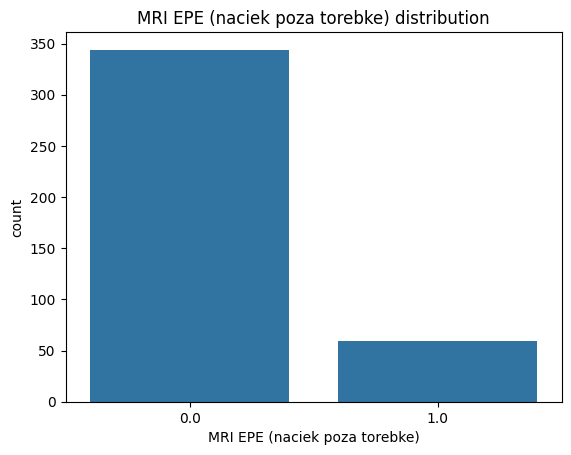

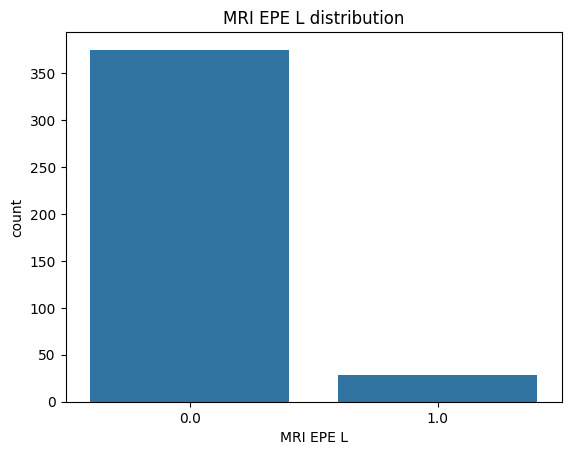

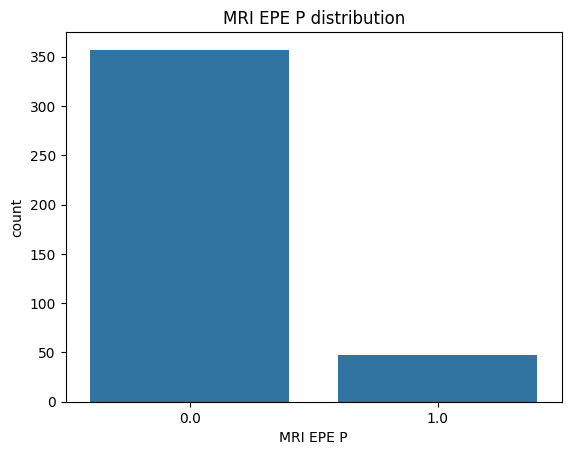

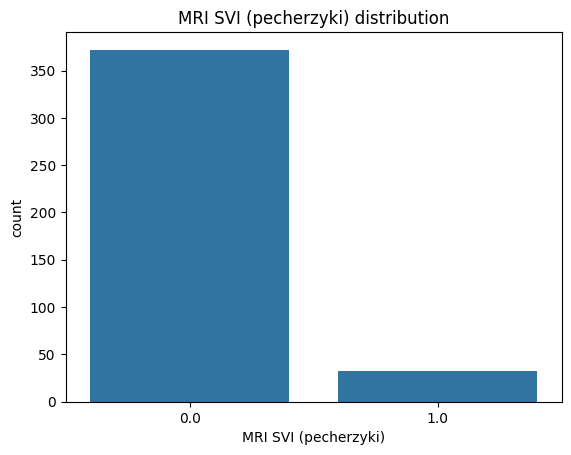

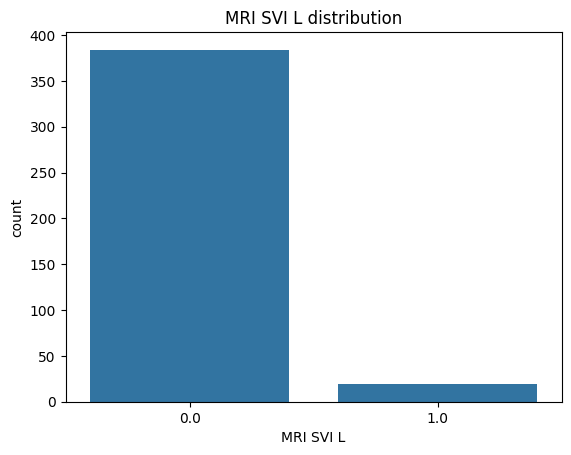

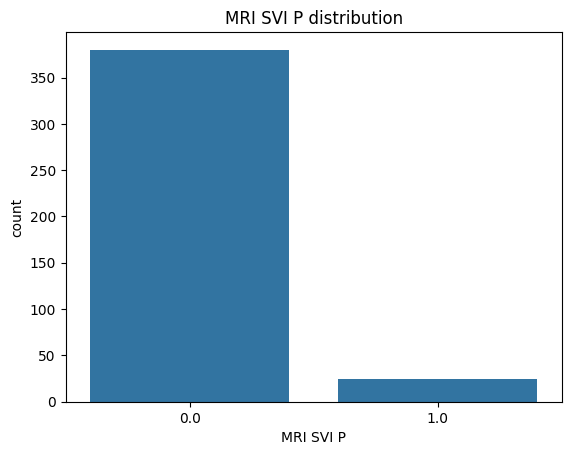

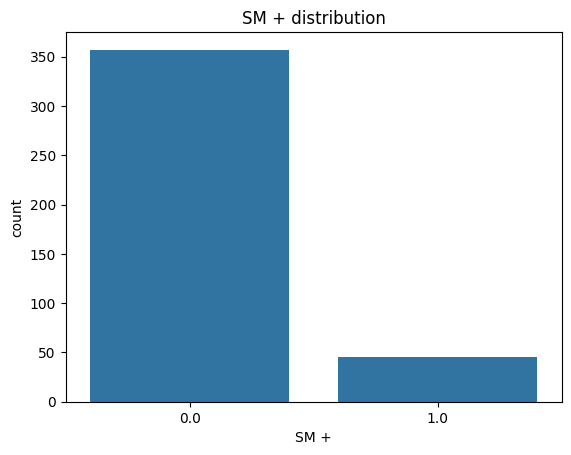

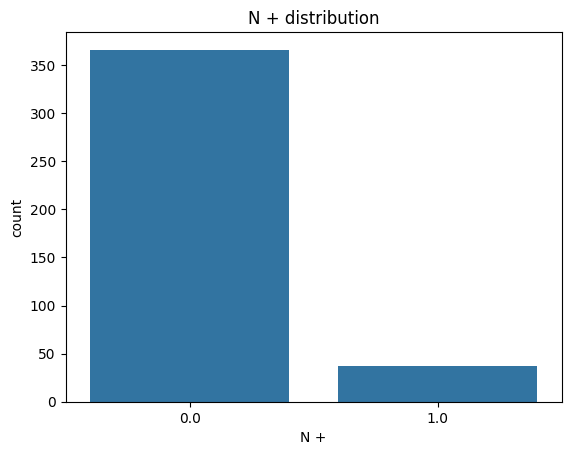

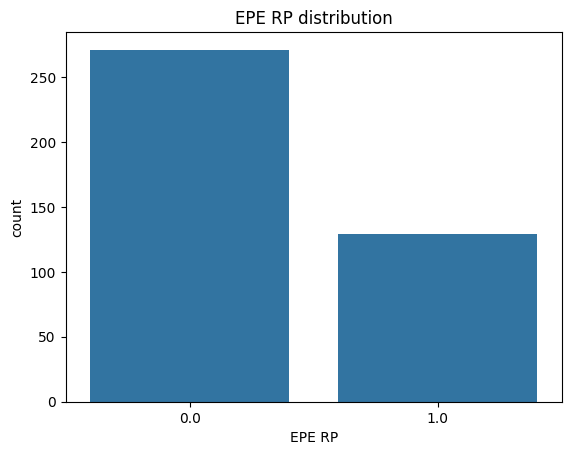

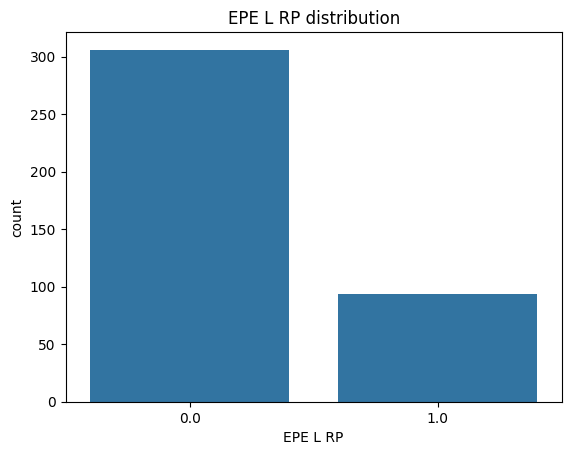

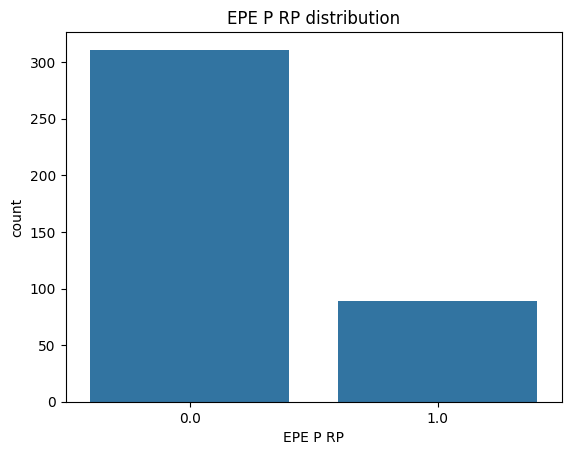

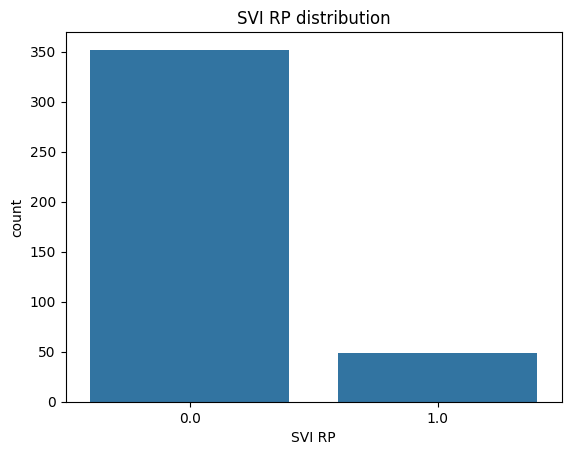

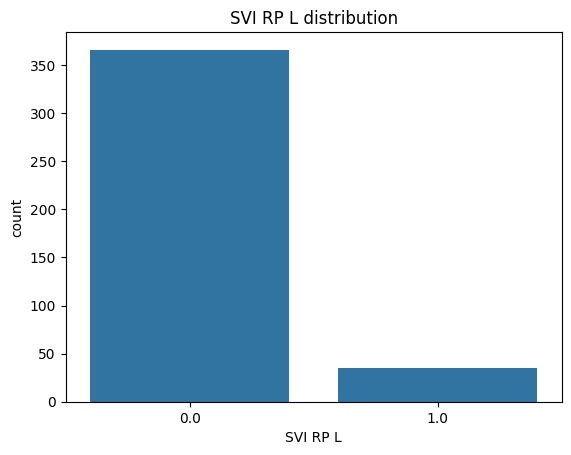

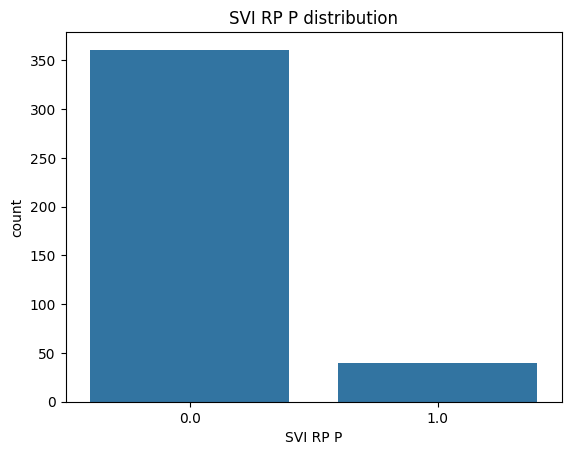

In [31]:
for col in binary_cols:
    sns.countplot(x=reduced_df[col])
    plt.title(f"{col} distribution")
    plt.show()

There is high imbalance between values

Categorical columns

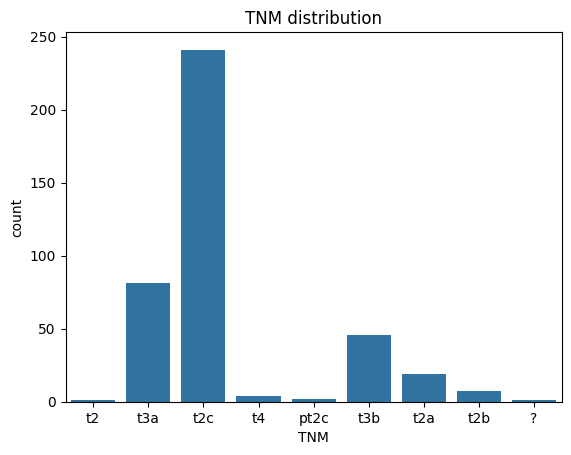

In [32]:
for col in categorical_cols[1:]:
    sns.countplot(x=reduced_df[col])
    plt.title(f"{col} distribution")
    plt.show()

# Plots

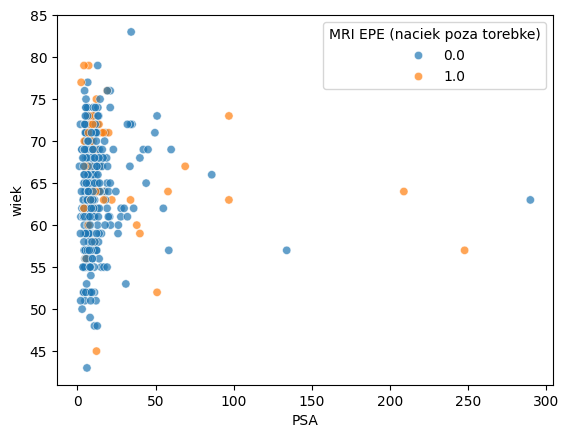

In [33]:
sns.scatterplot(data=reduced_df, x='PSA', y='wiek', hue='MRI EPE (naciek poza torebke)', alpha=0.7)
plt.show()

# Correlation

In [34]:
px.imshow(reduced_df.select_dtypes(include=['int64', 'float64']).corr(), text_auto=True, width=900, height=700)

There is significant correlation between columns that represent left/right side which is to be expected.

Correlances are overall quite high.

Correlation of EPE after RP and EPE on MRI

In [ ]:
reduced_df[['EPE RP', 'MRI EPE (naciek poza torebke)']].dropna(axis=0).corr()

EPE RP  MRI EPE (naciek poza torebke)
EPE RP                           1.00                           0.28
MRI EPE (naciek poza torebke)    0.28                           1.00

# Modeling

In [88]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

In [89]:
numerical_cols = ['wiek', 'PSA', 'PSAdensity', 'MRI vol', 'MRI Pirads', 'MRI SIZE']
categorical_cols = ['MRI EPE (naciek poza torebke)', 'MRI EPE L', 'MRI EPE P', 'MRI SVI (pecherzyki)', 'MRI SVI L', 'MRI SVI P','Bx ISUP Grade P', 'Bx ISUP Grade L']
# removed 4 patients where EPE RP is not provided
model_df = reduced_df[reduced_df['EPE RP'].isnull()==False]

X = model_df[numerical_cols + categorical_cols]
y = model_df['EPE RP']

In [90]:
num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('normalization', MinMaxScaler())
])
cat_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline, numerical_cols),
    ('cat', cat_pipeline, categorical_cols)
])
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=2))
])

In [91]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
print(scores)
print(f"Mean: {scores.mean()}+-{scores.std()}")

[0.675  0.75   0.7625 0.7375 0.7   ]
Mean: 0.725+-0.032596012026013234
